In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [3]:
# id = '10G-kSN2QUpbqmjjtQToR8CLShg5b8Yhe'

In [4]:
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('crime.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set_style("darkgrid")

In [6]:
crime_data= pd.read_csv('crime.csv') 
crime_data.columns = crime_data.columns.str.lower()

In [7]:
crime_data.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic
0,2021224206,2021224206220200,2202,0,burglary-residence-by-force,burglary,4/18/2021 10:30:00 PM,4/19/2021 5:00:00 AM,4/21/2021 3:25:00 PM,300 W 11TH AVE,3142828.0,1692472.0,-104.992161,39.733543,6.0,611.0,civic-center,1,0
1,2021225308,2021225308240400,2404,0,theft-of-motor-vehicle,auto-theft,4/21/2021 11:25:00 PM,NaN,4/22/2021 12:01:00 AM,5700 BLK W DARTMOUTH AVE,3124936.0,1664570.0,-105.056261,39.657203,4.0,423.0,bear-valley,1,0
2,20216009452,20216009452239900,2399,0,theft-other,larceny,3/22/2021 12:51:00 PM,3/22/2021 12:51:00 PM,4/21/2021 10:13:00 PM,3412 N HUMBOLDT ST,3149191.0,1703917.0,-104.969299,39.764862,2.0,211.0,cole,1,0
3,20216009439,20216009439230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,4/21/2021 12:00:00 PM,4/21/2021 12:05:00 PM,4/21/2021 1:17:00 PM,1900 BLK S CLARKSON ST,3146781.0,1673727.0,-104.978488,39.682023,3.0,313.0,platt-park,1,0
4,20218017976,20218017976240400,2404,0,theft-of-motor-vehicle,auto-theft,3/9/2021 12:01:00 PM,4/21/2021 12:20:00 PM,4/21/2021 12:20:00 PM,24050 E 78TH AVE,3223419.0,1730557.0,-104.704438,39.836504,7.0,759.0,dia,1,0


#Data-Preprocessing

In [8]:
crime_data['offense_category_id'].value_counts()

traffic-accident                123484
all-other-crimes                 86451
public-disorder                  54616
larceny                          54477
theft-from-motor-vehicle         50575
auto-theft                       38894
drug-alcohol                     27522
burglary                         26934
other-crimes-against-persons     24995
aggravated-assault               14530
white-collar-crime                6998
robbery                           6890
sexual-assault                    4455
arson                              718
murder                             399
Name: offense_category_id, dtype: int64

In [9]:
#Replacing the offense_category_id 
offense_category_id = {
"larceny": 1, 
"public-disorder":2,
"theft-from-motor-vehicle":3,
"auto-theft":4,
"drug-alcohol":5,
"burglary":6,
"other-crimes-against-persons":7,
"aggravated-assault":8,
"white-collar-crime":9,
"sexual-assault":10,
"robbery":11,
"arson": 12,
"murder":13,
"traffic-accident":14,
"all-other-crimes":15
}

crime_data["crime_id"] = crime_data["offense_category_id"].replace(offense_category_id)

In [10]:
crime_data["crime_id"].value_counts()

14    123484
15     86451
2      54616
1      54477
3      50575
4      38894
5      27522
6      26934
7      24995
8      14530
9       6998
11      6890
10      4455
12       718
13       399
Name: crime_id, dtype: int64

In [11]:
crime_data.isnull().sum()

incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      337432
reported_date                  0
incident_address           44334
geo_x                       4455
geo_y                       4455
geo_lon                     4456
geo_lat                     4456
district_id                    1
precinct_id                    1
neighborhood_id                1
is_crime                       0
is_traffic                     0
crime_id                       0
dtype: int64

In [12]:
crime_data.drop(['offense_id', 'geo_x', 'geo_y', 'last_occurrence_date', 'incident_address'], axis=1, inplace=True)

In [13]:
crime_data.dropna (inplace=True)

In [14]:
crime_data.isnull().sum()

incident_id               0
offense_code              0
offense_code_extension    0
offense_type_id           0
offense_category_id       0
first_occurrence_date     0
reported_date             0
geo_lon                   0
geo_lat                   0
district_id               0
precinct_id               0
neighborhood_id           0
is_crime                  0
is_traffic                0
crime_id                  0
dtype: int64

In [15]:
crime_data['first_occurrence_date'] = pd.to_datetime (crime_data['first_occurrence_date']) 
crime_data['year'] = crime_data['first_occurrence_date'].dt.year 
crime_data['month'] = crime_data[ 'first_occurrence_date'].dt.month 
crime_data['day'] = crime_data['first_occurrence_date'].dt.day 
crime_data[ 'hour'] = crime_data['first_occurrence_date'].dt.hour

In [16]:
crime_data[crime_data.duplicated (keep=False)]

,incident_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,reported_date,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,crime_id,year,month,day,hour


#Data Exploration

<AxesSubplot:title={'center':'offense_category_id'}>

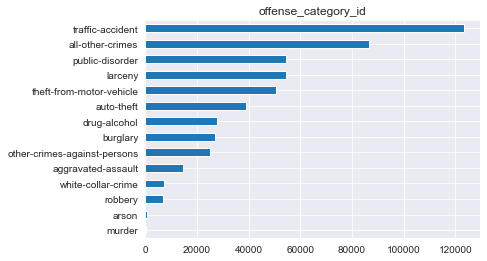

In [17]:
crime_data['offense_category_id'].value_counts() [:15].sort_values (ascending=True).plot(kind='barh', title='offense_category_id')

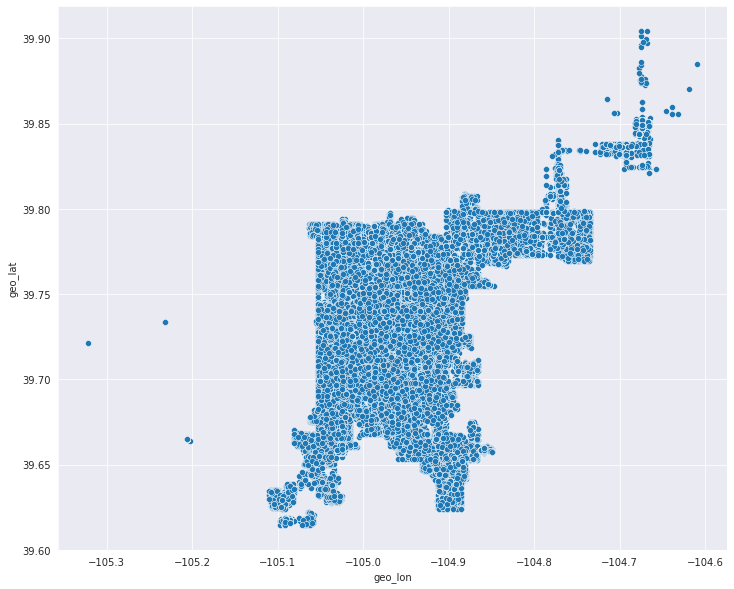

In [39]:
crime_data= crime_data[(crime_data['geo_lon'] < -50) & (crime_data['geo_lat'] > 38)] 
plt.figure(figsize=(12,10)) 
ax = sns.scatterplot (x='geo_lon', y='geo_lat', data=crime_data)

In [40]:
crime_data_2019 = crime_data[crime_data.year == 2019]

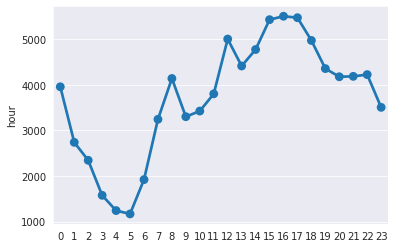

In [41]:
zone_plot = sns.pointplot (data=crime_data_2019,x=crime_data_2019. hour.value_counts().index,y=crime_data_2019.hour.value_counts())

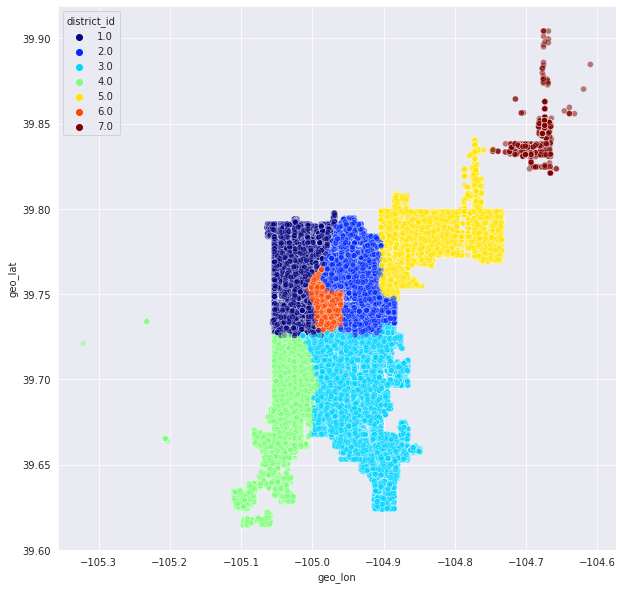

In [45]:
## district separation ## 

plt.figure(figsize=(10,10)) 
sns.scatterplot(x='geo_lon',
                y='geo_lat',
                alpha=0.5,
                hue='district_id',
                palette=plt.get_cmap('jet'),
                legend='full',
                data=crime_data
)

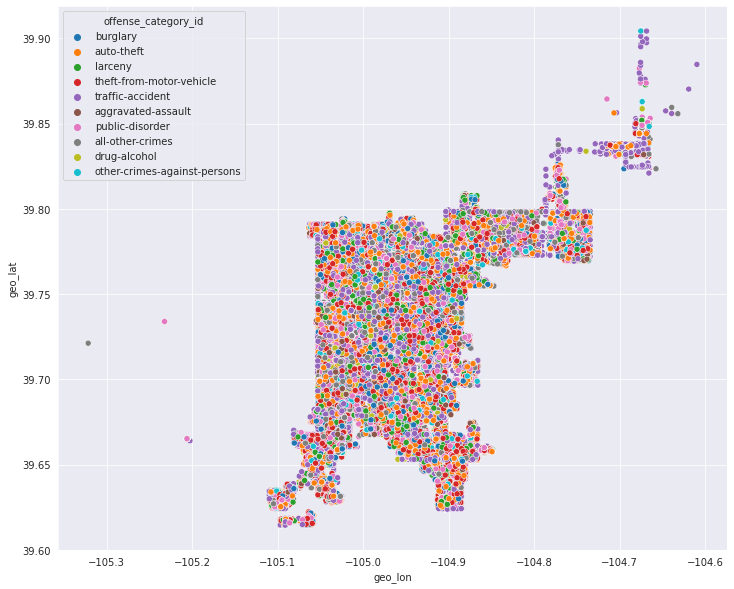

In [50]:
offense_cats = crime_data['offense_category_id'].value_counts() [:10].index

plt.figure(figsize=(12,10)) 
sns.scatterplot (x='geo_lon',
                 y='geo_lat',
                 hue='offense_category_id', 
                 data=crime_data[crime_data['offense_category_id'].isin(offense_cats)])

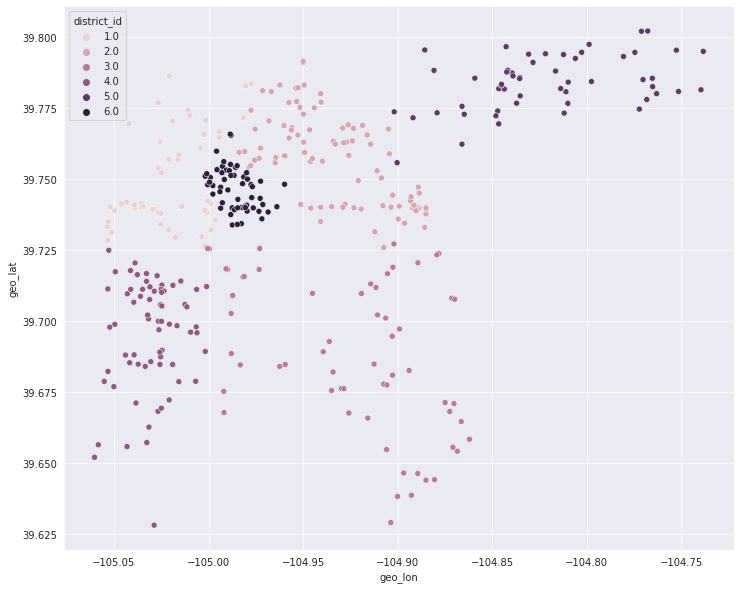

In [52]:
plt.figure(figsize=(12,10))

sns.scatterplot (x='geo_lon',
                 y='geo_lat',
                 hue='district_id',
                 data=crime_data[(crime_data['offense_category_id'] == 'murder')])

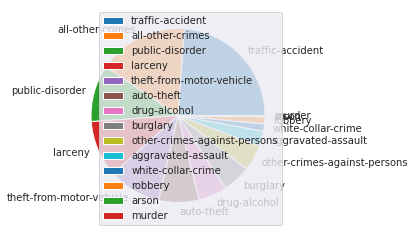

In [59]:
crime_data_primary_type_pie = plt.pie(crime_data.offense_category_id.value_counts(), labels=crime_data.offense_category_id.value_counts().index) 
plt.legend (loc = "best")

In [60]:
crime_data.corr()

,incident_id,offense_code,offense_code_extension,geo_lon,geo_lat,district_id,precinct_id,is_crime,is_traffic,crime_id,year,month,day,hour
incident_id,1.000000,-0.108733,0.022545,0.056667,0.028809,0.035764,0.038773,0.087640,-0.087814,-0.151986,0.047165,0.022443,0.000306,-0.013753
offense_code,-0.108733,1.000000,-0.081911,-0.016286,0.034551,-0.035823,-0.036090,-0.601378,0.602333,0.776256,-0.121494,-0.015350,0.000182,0.000989
offense_code_extension,0.022545,-0.081911,1.000000,0.001188,0.013371,0.018209,0.018639,0.200967,-0.201279,-0.058066,0.008132,0.000630,-0.001834,0.000314
geo_lon,0.056667,-0.016286,0.001188,1.000000,0.352464,0.250789,0.267067,-0.012024,0.011847,-0.014086,0.037004,0.000643,0.002000,-0.007509
geo_lat,0.028809,0.034551,0.013371,0.352464,1.000000,0.095861,0.096179,0.017018,-0.017152,0.032371,0.009482,-0.003376,0.000412,-0.004360
district_id,0.035764,-0.035823,0.018209,0.250789,0.095861,1.000000,0.999154,0.082286,-0.082473,-0.041025,0.012328,-0.001257,0.002925,0.001268
precinct_id,0.038773,-0.036090,0.018639,0.267067,0.096179,0.999154,1.000000,0.082580,-0.082766,-0.041393,0.012694,-0.001149,0.003011,0.001126
is_crime,0.087640,-0.601378,0.200967,-0.012024,0.017018,0.082286,0.082580,1.000000,-0.998448,-0.590988,0.069931,-0.013568,0.000426,0.008681
is_traffic,-0.087814,0.602333,-0.201279,0.011847,-0.017152,-0.082473,-0.082766,-0.998448,1.000000,0.592101,-0.069855,0.013663,-0.000379,-0.008703
crime_id,-0.151986,0.776256,-0.058066,-0.014086,0.032371,-0.041025,-0.041393,-0.590988,0.592101,1.000000,-0.102691,-0.011006,0.000461,-0.009642


In [61]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517317 entries, 0 to 521937
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             517317 non-null  int64         
 1   offense_code            517317 non-null  int64         
 2   offense_code_extension  517317 non-null  int64         
 3   offense_type_id         517317 non-null  object        
 4   offense_category_id     517317 non-null  object        
 5   first_occurrence_date   517317 non-null  datetime64[ns]
 6   reported_date           517317 non-null  object        
 7   geo_lon                 517317 non-null  float64       
 8   geo_lat                 517317 non-null  float64       
 9   district_id             517317 non-null  float64       
 10  precinct_id             517317 non-null  float64       
 11  neighborhood_id         517317 non-null  object        
 12  is_crime                517317

In [18]:
df=crime_data.drop(columns=['offense_type_id','offense_category_id','first_occurrence_date','reported_date','neighborhood_id','is_crime'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517482 entries, 0 to 521937
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             517482 non-null  int64  
 1   offense_code            517482 non-null  int64  
 2   offense_code_extension  517482 non-null  int64  
 3   geo_lon                 517482 non-null  float64
 4   geo_lat                 517482 non-null  float64
 5   district_id             517482 non-null  float64
 6   precinct_id             517482 non-null  float64
 7   is_traffic              517482 non-null  int64  
 8   crime_id                517482 non-null  int64  
 9   year                    517482 non-null  int64  
 10  month                   517482 non-null  int64  
 11  day                     517482 non-null  int64  
 12  hour                    517482 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 55.3 MB


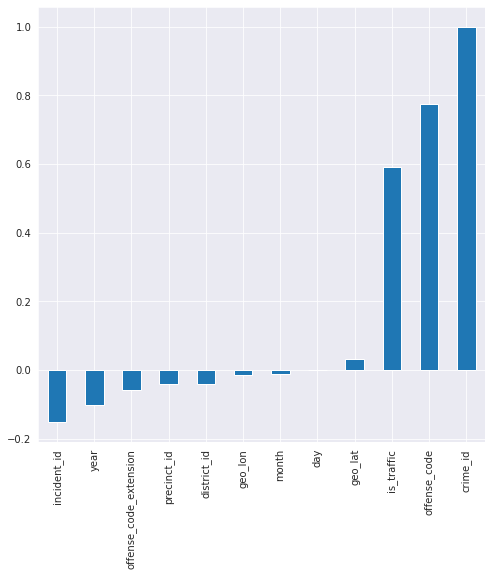

In [69]:
plt.figure(figsize=(8,8))

df.corr() ["crime_id"][:-1].sort_values().plot(kind='bar')

In [70]:
df

,incident_id,offense_code,offense_code_extension,geo_lon,geo_lat,district_id,precinct_id,is_traffic,crime_id,year,month,day,hour
0,2021224206,2202,0,-104.992161,39.733543,6.0,611.0,0,6,2021,4,18,22
1,2021225308,2404,0,-105.056261,39.657203,4.0,423.0,0,4,2021,4,21,23
2,20216009452,2399,0,-104.969299,39.764862,2.0,211.0,0,1,2021,3,22,12
3,20216009439,2305,0,-104.978488,39.682023,3.0,313.0,0,3,2021,4,21,12
4,20218017976,2404,0,-104.704438,39.836504,7.0,759.0,0,4,2021,3,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521933,2021535709,5499,0,-104.766985,39.772231,5.0,523.0,0,15,2021,9,17,7
521934,2021540548,1313,0,-104.877566,39.773252,5.0,512.0,0,7,2021,9,19,16
521935,20216018844,2399,0,-104.992968,39.741964,6.0,611.0,0,1,2021,9,4,3
521936,2021539365,5401,0,-104.983433,39.711142,3.0,312.0,1,14,2021,9,18,23


In [71]:
df['crime_id'].value_counts()

14    123373
15     86438
2      54610
1      54470
3      50572
4      38889
5      27521
6      26930
7      24991
8      14524
9       6997
11      6887
12       718
13       397
Name: crime_id, dtype: int64

#Test Train Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['crime_id'], axis=1),df['crime_id'], test_size=0.33, random_state=42)

#Random Forest

In [26]:
rfc = RandomForestClassifier (n_estimators = 10, criterion='entropy', random_state=42)

In [27]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [28]:
y_pred=rfc.predict(x_test)

In [29]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(conf_matrix)

[[17953     0    28     0     0     0     0     0     1     0     0     0
      0     0]
 [    1 17826     0     0    23    13     8    18     0     0     5     0
      0    24]
 [   69     0 16684     0     0     0     0     0     0     0     0     0
      0     0]
 [    2     0     0 12972     0     0     0     0     0     0     0     0
      0     0]
 [    7    34     0     0  9036     0     0     0     0     0     0     0
      0     6]
 [    2     5     6     0     0  8904     0     0     0     0     1     0
      0     0]
 [    1    14     3     0   133     2  8040     4     0     2     1     0
      0     3]
 [    0    20     1     0     0     7    39  4709     0     1     2     0
      0     0]
 [   22     0     0    13     9     0     0     0  2245     0     0     0
      0     0]
 [    0     1     1     0     0     7    41     0     0  2133     0     1
      0     7]
 [    2    34     2     0     0    44     0     4     0     0   162     0
      0     2]
 [    0     0     0  

In [30]:
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)) 
print('Error =', 1- metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9928090414007145
Error = 0.007190958599285535


In [32]:
import pickle
pickle.dump(rfc,open('model.pkl','wb')) 
model=pickle.load(open('model.pkl','rb'))